In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
def save_fig_final(train_error,test_error,X_filename,num_factor,learning_rate,nr_epochs):
    fig_filename="train_final_error_NF"+str(num_factor)+"_LR"+str(learning_rate)+"_E"+str(nr_epochs)
    ax = plt.figure().gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.plot(train_error,label="Train")
    plt.plot(test_error,label="Test")
    plt.xlabel("Epoch")
    plt.ylabel("Error (RMSE)")
    #plt.ylim(0.5,1.1)
    plt.legend()
    if "genres" in X_filename:
        plt.savefig("figures/"+fig_filename+"_with_genres.pdf")
    elif "simple" in X_filename:
        plt.savefig("figures/simple/"+fig_filename+"_simple.pdf")
    else:
        plt.savefig("figures/"+fig_filename+".pdf")
def save_fig(train_error,val_error,X_filename,num_factor,learning_rate,nr_epochs):
    fig_filename="train_val_error_NF"+str(num_factor)+"_LR"+str(learning_rate)+"_E"+str(nr_epochs)
    ax = plt.figure().gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.plot(train_error,label="Train")
    #plt.plot(val_error,label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error (RMSE)")
    #plt.ylim(0.5,1.1)
    plt.legend()
    if "genres" in X_filename:
        plt.savefig("figures/"+fig_filename+"_with_genres.pdf")
    elif "simple" in X_filename:
        plt.savefig("figures/simple/"+fig_filename+"_simple.pdf")
    else:
        plt.savefig("figures/"+fig_filename+".pdf")
def save_error(train_error, val_error,X_filename,num_factor,learning_rate,nr_epochs):
    txt_filename="train_val_error_NF"+str(num_factor)+"_LR"+str(learning_rate)+"_E"+str(nr_epochs)
    data = np.array([train_error,val_error])
    if "genres" in X_filename:
        np.savetxt("error/"+txt_filename+"_with_genres.txt",data)
    elif "simple" in X_filename:
        np.savetxt("error/simple/"+txt_filename+"_simple.txt",data)
    else:
        np.savetxt("error/"+txt_filename+".txt",data)
def lowest_val_error_from_txt(filepath):
    data = np.genfromtxt(filepath)
    val_error=data[1,:]
    min_val=np.min(val_error)
    epoch = np.argmin(val_error)
    return epoch,min_val
def plot_gridsearch(low_val_arr):
    z = low_val_arr[:,0] # val score
    x=low_val_arr[:,1] # learning rate
    y=low_val_arr[:,2] # Num factors
    x=np.unique(x)
    y=np.unique(y)
    X,Y = np.meshgrid(x,y)

    Z=z.reshape(len(y),len(x))
    fig, ax = plt.subplots()
    pm=ax.pcolormesh(X,Y,Z,cmap='seismic_r')
    ax.set_xlabel("Learning Rate")
    ax.set_ylabel("Number of Factors [k]")
    fig.colorbar(pm,ax=ax)
    ax.ticklabel_format(axis='x',style='sci',scilimits=(0,0))
    plt.savefig("hyperparameter_tuning.pdf")
    plt.show()
    
#plt.show()

Training size: 60501, Validation size: 20167, Test size: 20168
Train FM RMSE: 1.0824 Validation FM RMSE: 1.0859 Epoch: 0
Train FM RMSE: 1.0435 Validation FM RMSE: 1.0468 Epoch: 1
Train FM RMSE: 1.0217 Validation FM RMSE: 1.0250 Epoch: 2
Train FM RMSE: 1.0082 Validation FM RMSE: 1.0114 Epoch: 3
Train FM RMSE: 0.9989 Validation FM RMSE: 1.0023 Epoch: 4
Train FM RMSE: 0.9921 Validation FM RMSE: 0.9956 Epoch: 5
Train FM RMSE: 0.9867 Validation FM RMSE: 0.9903 Epoch: 6
Train FM RMSE: 0.9822 Validation FM RMSE: 0.9860 Epoch: 7
Train FM RMSE: 0.9783 Validation FM RMSE: 0.9823 Epoch: 8
Train FM RMSE: 0.9748 Validation FM RMSE: 0.9790 Epoch: 9
Train FM RMSE: 0.9716 Validation FM RMSE: 0.9760 Epoch: 10
Train FM RMSE: 0.9687 Validation FM RMSE: 0.9732 Epoch: 11
Train FM RMSE: 0.9660 Validation FM RMSE: 0.9707 Epoch: 12
Train FM RMSE: 0.9635 Validation FM RMSE: 0.9684 Epoch: 13
Train FM RMSE: 0.9611 Validation FM RMSE: 0.9661 Epoch: 14
Train FM RMSE: 0.9589 Validation FM RMSE: 0.9641 Epoch: 15
Tra

/var/folders/gj/b_6qbpf106vgb2f614dhqxt40000gn/T/ipykernel_8292/1358604756.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  ax = plt.figure().gca()


Train FM RMSE: 1.0407 Validation FM RMSE: 1.0432 Epoch: 0
Train FM RMSE: 1.0062 Validation FM RMSE: 1.0087 Epoch: 1
Train FM RMSE: 0.9902 Validation FM RMSE: 0.9930 Epoch: 2
Train FM RMSE: 0.9799 Validation FM RMSE: 0.9831 Epoch: 3
Train FM RMSE: 0.9720 Validation FM RMSE: 0.9756 Epoch: 4
Train FM RMSE: 0.9654 Validation FM RMSE: 0.9694 Epoch: 5
Train FM RMSE: 0.9596 Validation FM RMSE: 0.9641 Epoch: 6
Train FM RMSE: 0.9545 Validation FM RMSE: 0.9594 Epoch: 7
Train FM RMSE: 0.9498 Validation FM RMSE: 0.9552 Epoch: 8
Train FM RMSE: 0.9455 Validation FM RMSE: 0.9513 Epoch: 9
Train FM RMSE: 0.9415 Validation FM RMSE: 0.9477 Epoch: 10
Train FM RMSE: 0.9378 Validation FM RMSE: 0.9444 Epoch: 11
Train FM RMSE: 0.9343 Validation FM RMSE: 0.9413 Epoch: 12
Train FM RMSE: 0.9310 Validation FM RMSE: 0.9384 Epoch: 13
Train FM RMSE: 0.9279 Validation FM RMSE: 0.9357 Epoch: 14
Train FM RMSE: 0.9249 Validation FM RMSE: 0.9332 Epoch: 15
Train FM RMSE: 0.9221 Validation FM RMSE: 0.9308 Epoch: 16
Train F

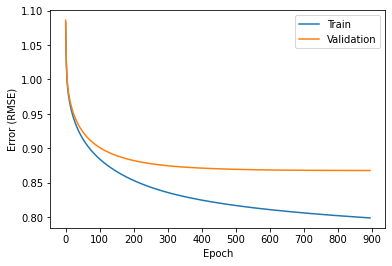

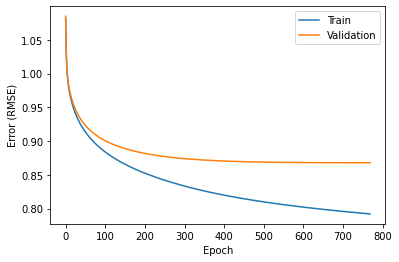

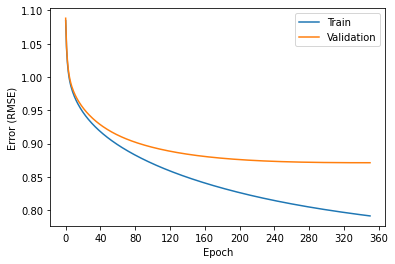

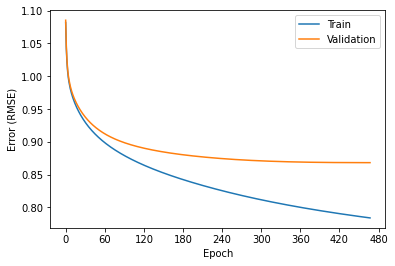

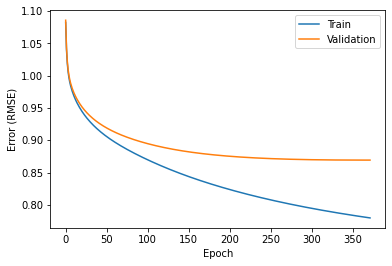

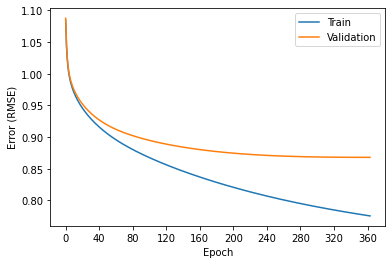

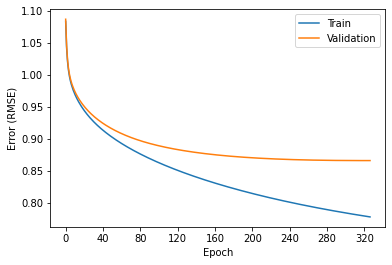

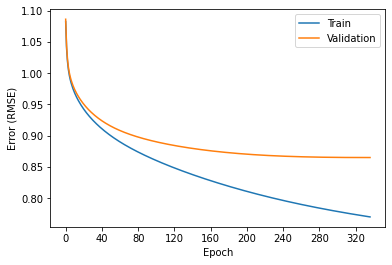

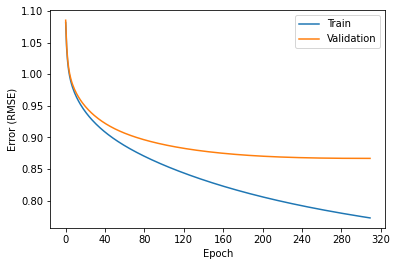

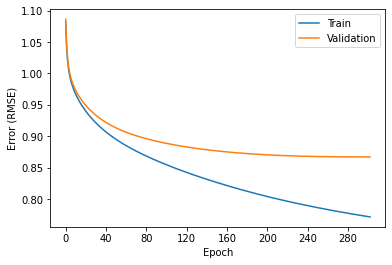

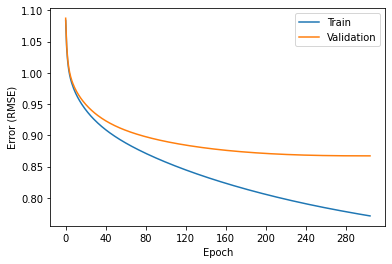

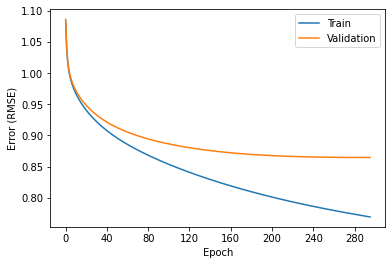

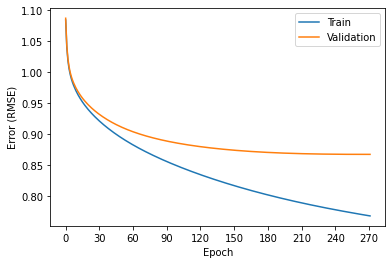

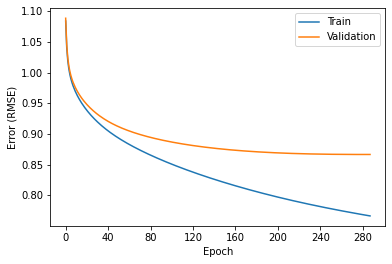

IndexError: index 0 is out of bounds for axis 0 with size 0

In [30]:
import numpy as np
from scipy import sparse
from pyfm import pylibfm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#X_filename = "ml_latest_small_formated_with_genres.npz" # User|movies|movies rated|time|last movie rated| genres
#X_filename = "ml_latest_small_formated.npz" # User|movies|movies rated|time|last movie rated
#X_filename = "ml_latest_small_simple_formated.npz" # User|movies|
#X_filename = "ml_latest_small_simple_formated_with_genres.npz" # User|movies|Genres
#X_filename = "ml_latest_small_simple_user_movies_formated_with_genres.npz" # User|movies|movies rated| Genres
#X_filename = 'user_encoded-movies_encoded-time-genre_matrix.npz' # User|movies|time|Genres
X_filename = 'user_encoded-movies_encoded-genre_matrix.npz' # User|movies|Genres
#X_filename = 'user_encoded-movies_encoded-last_movies-genre_matrix.npz' # User|movies|last movie|Genres

X = sparse.load_npz(X_filename)
filename="ml-latest-small/ratings.csv"
data=np.genfromtxt(filename,skip_header=1,delimiter=",")
y = data[:,-2]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print("Training size: %d, Validation size: %d, Test size: %d" % (X_train.shape[0],X_val.shape[0],X_test.shape[0]))



#num_factor=15
#learning_rate=0.001
learning_rate_arr=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001]#np.linspace(0.0001,0.001,10)
num_factor_arr=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
nr_epochs=100
min_epoch=30
es_buffer=10 #Stop when the validation error is larger than the value 10 before it
error_dict={}

for learning_rate in learning_rate_arr:
    for num_factor in num_factor_arr:
        fm = pylibfm.FM(num_cols=np.max(X_train.indices) + 1, num_factor=num_factor, task="regression", learning_rate=learning_rate)
        train_error=[]
        val_error=[]
        early_stopping = False
        nr_epochs=0
        while early_stopping==False:
        #for i in range(nr_epochs):
            fm.learn(X_train, y_train)
            preds_train = fm.predict(X_train)
            preds_val = fm.predict(X_val)
            train_error_tmp = mean_squared_error(y_train, preds_train,squared=False)    # RMSE
            val_error_tmp = mean_squared_error(y_val, preds_val,squared=False)        # RMSE
            train_error.append(train_error_tmp)
            val_error.append(val_error_tmp)
            if nr_epochs>min_epoch:
                if val_error_tmp>val_error[-es_buffer]:
                    early_stopping=True
            print("Train FM RMSE: %.4f Validation FM RMSE: %.4f Epoch: %d" % (train_error_tmp, val_error_tmp, nr_epochs))
            nr_epochs+=1
        error_dict[str(learning_rate)+"_"+str(num_factor)+"_train"]=train_error
        error_dict[str(learning_rate)+"_"+str(num_factor)+"_val"]=val_error
        save_error(train_error,val_error,X_filename,num_factor,learning_rate,nr_epochs)
        save_fig(train_error,val_error,X_filename,num_factor,learning_rate,nr_epochs)
        print("Best val RMSE is:",np.min(val_error),"at epoch",np.argmin(val_error))

In [95]:
import glob
path="error/"
low_val_arr=np.zeros((len(learning_rate_arr)*len(num_factor_arr),4))
i=0
for learning_rate in learning_rate_arr:
    for num_factor in num_factor_arr:
        txt_filename="train_val_error_NF"+str(num_factor)+"_LR"+str(learning_rate)
        for filename in glob.glob(path+txt_filename+"*.txt"):
            #print(filename)
            epoch,low_val = lowest_val_error_from_txt(filename)
            low_val_arr[i,:] = [low_val,learning_rate,num_factor,epoch]
            i+=1
print(low_val_arr[np.argmax(low_val_arr[:,-1])])
print(min(low_val_arr[:,-1]))
#plot_gridsearch(low_val_arr)


[8.67910019e-01 1.00000000e-04 1.00000000e+00 8.90000000e+02]
30.0


In [3]:
#We now use the test set on optimal parameters
import numpy as np
from scipy import sparse
from pyfm import pylibfm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


X_filename = 'user_encoded-movies_encoded-genre_matrix.npz' # User|movies|Genres


X = sparse.load_npz(X_filename)
filename="ml-latest-small/ratings.csv"
data=np.genfromtxt(filename,skip_header=1,delimiter=",")
y = data[:,-2]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print("Training size: %d, Test size: %d" % (X_train.shape[0],X_test.shape[0]))



num_factor=13
learning_rate=0.0005
#learning_rate_arr=[0.0005]#np.linspace(0.0001,0.001,10)
#num_factor_arr=[13]
nr_epochs=62 # Derived from testing
#min_epoch=30
#es_buffer=10 #Stop when the validation error is larger than the value 10 before it
error_dict={}


fm = pylibfm.FM(num_cols=np.max(X_train.indices) + 1, num_factor=num_factor, task="regression", learning_rate=learning_rate)
train_error=[]
test_error=[]
early_stopping = False

for i in range(nr_epochs):
    fm.learn(X_train, y_train)
    preds_train = fm.predict(X_train)
    preds_test = fm.predict(X_test)
    train_error_tmp = mean_squared_error(y_train, preds_train,squared=False)    # RMSE
    test_error_tmp = mean_squared_error(y_test, preds_test,squared=False)        # RMSE
    train_error.append(train_error_tmp)
    test_error.append(test_error_tmp)
    print("Train FM RMSE: %.4f Test FM RMSE: %.4f Epoch: %d" % (train_error_tmp, test_error_tmp, i))
    #nr_epochs+=1
error_dict[str(learning_rate)+"_"+str(num_factor)+"_train"]=train_error
error_dict[str(learning_rate)+"_"+str(num_factor)+"_test"]=test_error
#save_error(train_error,test_error,X_filename,num_factor,learning_rate,nr_epochs)
#save_fig_final(train_error,test_error,X_filename,num_factor,learning_rate,nr_epochs)
print("Best test RMSE is:",np.min(test_error),"at epoch",np.argmin(test_error))

Training size: 80668, Test size: 20168
Train FM RMSE: 0.9864 Test FM RMSE: 0.9936 Epoch: 0
Train FM RMSE: 0.9608 Test FM RMSE: 0.9698 Epoch: 1
Train FM RMSE: 0.9443 Test FM RMSE: 0.9551 Epoch: 2
Train FM RMSE: 0.9316 Test FM RMSE: 0.9441 Epoch: 3
Train FM RMSE: 0.9212 Test FM RMSE: 0.9353 Epoch: 4
Train FM RMSE: 0.9123 Test FM RMSE: 0.9280 Epoch: 5
Train FM RMSE: 0.9046 Test FM RMSE: 0.9219 Epoch: 6
Train FM RMSE: 0.8977 Test FM RMSE: 0.9165 Epoch: 7
Train FM RMSE: 0.8914 Test FM RMSE: 0.9118 Epoch: 8
Train FM RMSE: 0.8857 Test FM RMSE: 0.9077 Epoch: 9
Train FM RMSE: 0.8805 Test FM RMSE: 0.9039 Epoch: 10
Train FM RMSE: 0.8756 Test FM RMSE: 0.9005 Epoch: 11
Train FM RMSE: 0.8710 Test FM RMSE: 0.8975 Epoch: 12
Train FM RMSE: 0.8667 Test FM RMSE: 0.8946 Epoch: 13
Train FM RMSE: 0.8626 Test FM RMSE: 0.8920 Epoch: 14
Train FM RMSE: 0.8587 Test FM RMSE: 0.8896 Epoch: 15
Train FM RMSE: 0.8550 Test FM RMSE: 0.8873 Epoch: 16
Train FM RMSE: 0.8515 Test FM RMSE: 0.8852 Epoch: 17
Train FM RMSE: 0.

Below are some plotting functions

[ 6 10  4 ...  6  4  8]
[7 8 6 ... 8 5 5]
(10, 10)
[0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
[0.007326007326007326, 0.013050570962479609, 0.09401709401709402, 0.12682602921646746, 0.2585227272727273, 0.3242363545317977, 0.3839726547664261, 0.3166051660516605, 0.17584369449378331, 0.0532117065754466]


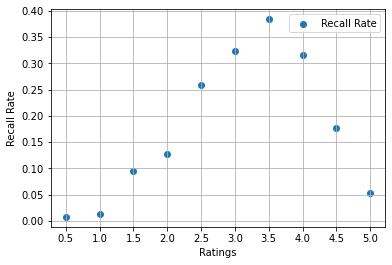

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

import seaborn as sns

def round_off_rating(preds):
    r2=[]
    for r in preds:
        r2.append(round(r * 2) / 2)
    return r2
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])
def overlay_distribution(r1,r2):
    
    u1, inv1 = np.unique(r1, return_inverse=True)
    u2, inv2 = np.unique(r2, return_inverse=True)

    counts1 = np.bincount(inv1)
    counts2 = np.bincount(inv2)


    fig, ax = plt.subplots()
    plt.grid(axis="y",zorder=0)

    plt.bar(u1, counts1/len(r1), width=0.5,edgecolor='black',alpha=0.5,label="Train-set Ratings",zorder=1)#,bins_labels='r1')
    plt.bar(u2, counts2/len(r2), width=0.5,edgecolor='black',alpha=0.5,label="Test-set Ratings",color="r",zorder=2)#,bins_labels='r2')


    #n, bins, patches=plt.hist(ratings,weights=np.ones(len(ratings)) / len(ratings),edgecolor='black', linewidth=1.2,align="left")
    #plt.bar(ratings)
    #ticklabels=("0.5","1","1.5","2","2.5","3","3.5","4","4.5","5")
    #tick_pos=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
    #ax.set_xticks(tick_pos)
    #ax.set_xticklabels( ticklabels )
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.xlabel("Rating")
    plt.ylabel("Percentage of Occurrences")
    plt.legend()
    #plt.savefig("ratings_overlay_distribution_train_test.pdf")
    plt.show()
def confusion_matrix_plot(target,pred):
    cm = confusion_matrix(target, pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='seismic');  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted ratings(rounded to half-integers)');ax.set_ylabel('True ratings'); 
    #ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(["0","0.5","1","1.5","2","2.5","3","3.5","4","4.5","5"])
    ax.yaxis.set_ticklabels(["0","0.5","1","1.5","2","2.5","3","3.5","4","4.5","5"])
    plt.savefig("confusion_matrix_best_model.pdf")
"""
def get_confusion_statistics(target,pred):
    cms = multilabel_confusion_matrix(target,pred)
    cms=np.array(cms)
    tn=cms[1:,0,0]
    fn=cms[1:,1,0]
    tp=cms[1:,1,1]
    fp=cms[1:,0,1]
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tn+tp)/(tn+fp+tp+fn)
    print(cms.shape)
    return recall, precision, accuracy

def plot_confusion_statistics(recall,precision,accuracy):
    r=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
    plt.plot(r,recall,label="Recall Rate")
    plt.plot(r,precision,label="Precision")
    plt.plot(r,accuracy,label="Accuracy")
    plt.xticks(r,labels=["0.5","1","1.5","2","2.5","3","3.5","4","4.5","5"])
    plt.xlabel("Ratings")
    plt.legend()
    plt.ylabel("")
"""
def recall_rate_plot(target,pred):
    cm = confusion_matrix(target, pred)
    cm=cm[1:,1:]
    print(cm.shape)
    recalls=[]
    for i,line in enumerate(cm[:,:]):
        recalls.append(cm[i,i])
        recalls[-1]=recalls[-1]/sum(cm[i,:])
    ratings=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
    print(ratings)
    print(recalls)
    plt.grid()
    plt.scatter(ratings,recalls,label="Recall Rate")
    plt.xlabel("Ratings")
    plt.xticks(ratings)
    plt.ylabel("Recall Rate")
    plt.legend()
    plt.savefig("recall_rate.pdf")
    #return recalls


#r1=y_train
r1=y_test
#r1=y_test
preds=fm.predict(X_test)
preds=preds*2
r1=r1*2
r1=round_off_rating(r1)
r2=round_off_rating(preds)
r1=np.array(r1)
r2=np.array(r2)

r1=r1.astype(int)

r2=r2.astype(int)
print(r1)
print(r2)
#print(r1)
#print(preds)
#print(r2)
#overlay_distribution(r1,r2)
#confusion_matrix_plot(r1,r2)
recall_rate_plot(r1,r2)
#plt.plot(recall)
#recall,precision,accuracy = get_confusion_statistics(r1,r2)
#plot_confusion_statistics(recall,precision,accuracy)